# 怎麼用pandas來計算常見的技術指標 - 移動平均、指數移動平均、MACD
我們這邊講一下怎麼用pandas來計算常見的技術指標，包括
- 移動平均線
- 指數移動平均線
- MACD

In [26]:
#載入套件庫與讀入資料
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('TWStock_2')
tsmc = pd.read_sql(con=db,sql='SELECT * FROM "2330"')

In [27]:
tsmc.head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,294,台積電,"25,211,563","5,043","3,163,386,515",124.50,126.00,124.50,126.00,+,0.5,125.50,168,126.00,"1,656",16.62,2014-06-19 00:00:00
1,294,台積電,"31,589,978","5,267","3,951,298,152",126.50,127.00,124.00,124.50,-,1.5,124.00,"3,758",124.50,177,16.42,2014-06-20 00:00:00
2,294,台積電,"25,147,462","6,320","3,108,562,826",125.00,125.50,123.00,123.00,-,1.5,123.00,"3,154",123.50,"1,289",16.23,2014-06-23 00:00:00
3,294,台積電,"36,234,466","8,507","4,451,530,440",123.00,123.50,122.00,123.00,,0.0,122.50,"1,699",123.00,857,16.23,2014-06-24 00:00:00
4,294,台積電,"31,028,964","7,395","3,835,858,072",123.00,124.50,123.00,123.50,+,0.5,123.00,"3,864",123.50,"2,084",16.29,2014-06-25 00:00:00


In [28]:
#清理資料
#我們需要成交股數、開盤價、最高價、最低價、收盤價的資料
#並使用Date當作我們的索引值

tsmc.index = pd.to_datetime(tsmc['Date'])
tsmc = tsmc[['成交股數','開盤價','最高價','最低價','收盤價']]
tsmc.columns = ['Volume','Open','High','Low','Close']
tsmc['Close'] = pd.to_numeric(tsmc['Close'])

In [29]:
tsmc.head()

,Volume,Open,High,Low,Close
Date,,,,,
2014-06-19,"25,211,563",124.50,126.00,124.50,126.0
2014-06-20,"31,589,978",126.50,127.00,124.00,124.5
2014-06-23,"25,147,462",125.00,125.50,123.00,123.0
2014-06-24,"36,234,466",123.00,123.50,122.00,123.0
2014-06-25,"31,028,964",123.00,124.50,123.00,123.5


## 移動平均線
移動平均線(Moving Average)應該是我們最常運用的技術指標了，當我們畫出均線後，我們就可以比較目前價格與均價之間的關係。其n天移動平均線的計算公式為
$$MA = \frac{(C_1 + \cdots C_n)}{n}$$
為n天的收盤價的平均，我們如何利用pandas來計算移動平均線勒？其實非常簡單，我們可以利用DataFrame下面的rolling方法，就能計算出移動平均線了

In [30]:
#我們分別計算7天,15天與30天的移動平均線
tsmc['MA_7'] = tsmc['Close'].rolling(7).mean()
tsmc['MA_15'] = tsmc['Close'].rolling(15).mean()
tsmc['MA_30'] = tsmc['Close'].rolling(30).mean()

## 指數移動平均線
當我們要比較均價的趨勢快慢時，我們可以利用指數移動平均數(EMA)，期計算公式為
$$EMA_{today} = \alpha \times Price_{today} + (1-\alpha) \times EMA_{yesterday}$$
這邊$\alpha$一般取$2/(n+1)$，另外，由於我們需要初始值來計算EMA，我們可以直接取第一天的收盤價當做$EMA_1$
，而在DataFrame下面，我們也有對應的方法ewm來計算指數移動平均線

In [31]:
tsmc['EMA_12'] = tsmc['Close'].ewm(span=12).mean()
tsmc['EMA_26'] = tsmc['Close'].ewm(span=26).mean()

In [32]:
tsmc.tail()

,Volume,Open,High,Low,Close,MA_7,MA_15,MA_30,EMA_12,EMA_26
Date,,,,,,,,,,
2019-06-04,"24,443,428",237.50,238.00,233.00,233.0,232.642857,235.933333,247.966667,235.979642,241.502706
2019-06-05,"35,901,584",238.00,238.00,234.00,235.0,233.214286,235.000000,246.866667,235.828928,241.021025
2019-06-06,"34,651,731",231.50,232.00,229.50,232.0,233.428571,234.000000,245.633333,235.239862,240.352800
2019-06-10,"35,521,888",237.50,240.00,234.50,240.0,234.928571,233.900000,244.716667,235.972191,240.326667
2019-06-11,"34,691,670",240.00,246.00,239.00,244.5,236.857143,234.333333,244.200000,237.284162,240.635803


## MACD
根據[維基百科](https://www.wikiwand.com/zh-tw/MACD):
是股票交易中一種常見的技術分析工具，由Gerald Appel於1970年代提出，用於研判股票價格變化的強度、方向、能量，以及趨勢周期，以便把握股票買進和賣出的時機。MACD指標由一組曲線與圖形組成，通過收盤時股價或指數的快變及慢變的指數移動平均值（EMA）之間的差計算出來。「快」指更短時段的EMA，而「慢」則指較長時段的EMA，最常用的是12及26日EMA。
其計算公式為
$$ DIF = EMA_{(close,12)} - EMA_{(close,26)}$$
$$ DEM = EMA(DIF,9) $$
$$ OSC = DIF - DEM $$

In [33]:
tsmc['DIF'] = tsmc['EMA_12'] - tsmc['EMA_26']
tsmc['DEM'] = tsmc['DIF'].ewm(span=9).mean()
tsmc['OSC'] = tsmc['DIF'] - tsmc['DEM']

In [34]:
tsmc.head()

,Volume,Open,High,Low,Close,MA_7,MA_15,MA_30,EMA_12,EMA_26,DIF,DEM,OSC
Date,,,,,,,,,,,,,
2014-06-19,"25,211,563",124.50,126.00,124.50,126.0,NaN,NaN,NaN,126.000000,126.000000,0.000000,0.000000,0.000000
2014-06-20,"31,589,978",126.50,127.00,124.00,124.5,NaN,NaN,NaN,125.187500,125.221154,-0.033654,-0.018697,-0.014957
2014-06-23,"25,147,462",125.00,125.50,123.00,123.0,NaN,NaN,NaN,124.333718,124.423115,-0.089397,-0.047672,-0.041725
2014-06-24,"36,234,466",123.00,123.50,122.00,123.0,NaN,NaN,NaN,123.912716,124.025274,-0.112559,-0.069653,-0.042906
2014-06-25,"31,028,964",123.00,124.50,123.00,123.5,NaN,NaN,NaN,123.800582,123.903461,-0.102879,-0.079537,-0.023342


In [35]:
tsmc = tsmc['2019-01-01':]

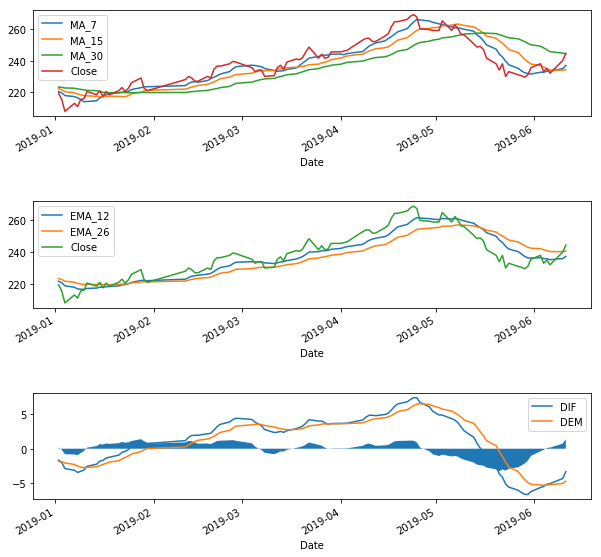

In [36]:
#來畫個圖吧
fig,ax = plt.subplots(3,1,figsize=(10,10))
plt.subplots_adjust(hspace=0.8)
tsmc['MA_7'].plot(ax=ax[0])
tsmc['MA_15'].plot(ax=ax[0])
tsmc['MA_30'].plot(ax=ax[0])
tsmc['EMA_12'].plot(ax=ax[1])
tsmc['EMA_26'].plot(ax=ax[1])
tsmc['Close'].plot(ax=ax[0])
tsmc['Close'].plot(ax=ax[1])
ax[0].legend()
ax[1].legend()
tsmc['DIF'].plot(ax=ax[2])
tsmc['DEM'].plot(ax=ax[2])
ax[2].fill_between(tsmc.index,0,tsmc['OSC'])
ax[2].legend()
plt.show()